In [36]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import numpy as np

In [37]:
df = pd.read_csv("vgsales.csv")
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [39]:
for col in df.columns:
    if df[col].dtype != "object":
        print(f"La colonne {col} a pour valeur minimal {df[col].min()} et maximal {df[col].max()}")

La colonne Rank a pour valeur minimal 1 et maximal 16600
La colonne Year a pour valeur minimal 1980.0 et maximal 2020.0
La colonne NA_Sales a pour valeur minimal 0.0 et maximal 41.49
La colonne EU_Sales a pour valeur minimal 0.0 et maximal 29.02
La colonne JP_Sales a pour valeur minimal 0.0 et maximal 10.22
La colonne Other_Sales a pour valeur minimal 0.0 et maximal 10.57
La colonne Global_Sales a pour valeur minimal 0.01 et maximal 82.74


In [40]:
print(" En Amérique, les ventes ont un totale de", df["NA_Sales"].sum())
print(" En Europe, les ventes ont un totale de", df["EU_Sales"].sum())
print(" Au Japon, les ventes ont un totale de", df["JP_Sales"].sum())
print(" Ailleurs, les ventes ont un totale de", df["Other_Sales"].sum())
print(" Avec un totale de ventes de", df["Global_Sales"].sum())

 En Amérique, les ventes ont un totale de 4392.950000000001
 En Europe, les ventes ont un totale de 2434.1299999999997
 Au Japon, les ventes ont un totale de 1291.0200000000002
 Ailleurs, les ventes ont un totale de 797.7500000000001
 Avec un totale de ventes de 8920.44


In [41]:
global_sales = df["Global_Sales"].sum()
print("L'Amérique représentent", df["NA_Sales"].sum() * 100 / global_sales,"% des ventes")
print("L'Europe représentent", df["EU_Sales"].sum() * 100 / global_sales,"% des ventes")
print("Le Japon représentent", df["JP_Sales"].sum() * 100 / global_sales,"% des ventes")
print("Ailleurs représentent", df["Other_Sales"].sum() * 100 / global_sales,"% des ventes")

L'Amérique représentent 49.245889216227006 % des ventes
L'Europe représentent 27.28710691400872 % des ventes
Le Japon représentent 14.472604490361462 % des ventes
Ailleurs représentent 8.942944518431828 % des ventes


In [42]:
print(df.groupby(['Year']).count())
    

        Rank  Name  Platform  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
Year                                                                           
1980.0     9     9         9      9          9         9         9         9   
1981.0    46    46        46     46         46        46        46        46   
1982.0    36    36        36     36         36        36        36        36   
1983.0    17    17        17     17         17        17        17        17   
1984.0    14    14        14     14         14        14        14        14   
1985.0    14    14        14     14         14        14        14        14   
1986.0    21    21        21     21         21        21        21        21   
1987.0    16    16        16     16         16        16        16        16   
1988.0    15    15        15     15         15        15        15        15   
1989.0    17    17        17     17         17        17        17        17   
1990.0    16    16        16     16     

In [43]:
print(df["Name"][df["Global_Sales"]==df["Global_Sales"].max()].values,df["Platform"][df["Global_Sales"]==df["Global_Sales"].max()].values,df["Global_Sales"][df["Global_Sales"]==df["Global_Sales"].max()].values)

['Wii Sports'] ['Wii'] [82.74]


In [44]:
for platform in df.groupby(['Platform']):
    max_sales = df.groupby(['Platform']).sum()["Global_Sales"].max()
    platform_sale = platform[1]["Global_Sales"].sum()
    if  round(platform_sale, 2) == round(max_sales, 2):
        print(platform[0], platform_sale)

('PS2',) 1255.6399999999999


In [45]:
for genre in df.groupby(['Genre']):
    max_sales = df.groupby(['Genre'])["Global_Sales"].mean().max()
    genre_sale = genre[1]["Global_Sales"].mean()
    if round(genre_sale, 2) == round(max_sales, 2):
        print(genre[0], genre_sale)

('Platform',) 0.9383408577878104


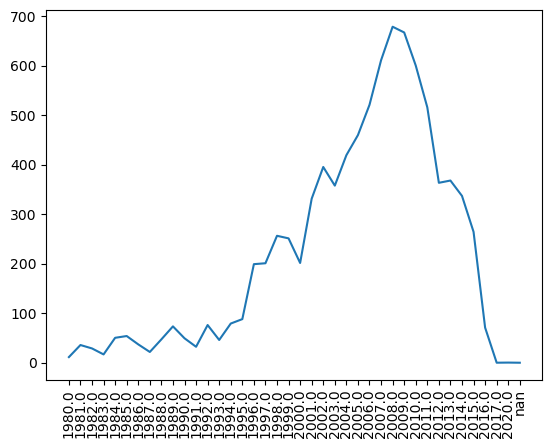

In [60]:
years = df["Year"].unique()
global_sales_evolution = {}
for year in years:
    global_sales_evolution[str(year)] = df[df["Year"] == year]["Global_Sales"].sum()


lists = sorted(global_sales_evolution.items()) 
year, values = zip(*lists)
plt.xticks(rotation=90)
plt.plot(year, values)

In [73]:
editors = df["Publisher"].unique()
editors_sales = {}
all_sales = df["Global_Sales"].sum()
for editor in editors:
    editors_sales[editor] = df[df["Publisher"] == editor]["Global_Sales"].sum() / all_sales

print(editors_sales)


{'Nintendo': 0.20027711637542545, 'Microsoft Game Studios': 0.02755357359054038, 'Take-Two Interactive': 0.04478927048441556, 'Sony Computer Entertainment': 0.06810202187336052, 'Activision': 0.08154978902385981, 'Ubisoft': 0.053217105882669466, 'Bethesda Softworks': 0.009208065969840052, 'Electronic Arts': 0.12446919658671546, 'Sega': 0.030602750536969023, 'SquareSoft': 0.0064626856971180795, 'Atari': 0.01762469115873208, '505 Games': 0.00626762805422154, 'Capcom': 0.022520189587060733, 'GT Interactive': 0.0028283358219998115, 'Konami Digital Entertainment': 0.031796637834008185, 'Sony Computer Entertainment Europe': 0.0026781190165507535, 'Square Enix': 0.016274981951562927, 'LucasArts': 0.009790996856657295, 'Virgin Interactive': 0.004917918847052389, 'Warner Bros. Interactive Entertainment': 0.017251391186981806, 'Universal Interactive': 0.0019920542036043066, 'Eidos Interactive': 0.011095865226378968, 'RedOctane': 0.0009730461726103196, 'Vivendi Games': 0.006525462869544551, 'Enix

In [76]:
editors_sorted = sorted(editors_sales.items(), key=lambda x:x[1], reverse=True)
print(editors_sorted)

[('Nintendo', 0.20027711637542545), ('Electronic Arts', 0.12446919658671546), ('Activision', 0.08154978902385981), ('Sony Computer Entertainment', 0.06810202187336052), ('Ubisoft', 0.053217105882669466), ('Take-Two Interactive', 0.04478927048441556), ('THQ', 0.038201030442444536), ('Konami Digital Entertainment', 0.031796637834008185), ('Sega', 0.030602750536969023), ('Namco Bandai Games', 0.028484020967575588), ('Microsoft Game Studios', 0.02755357359054038), ('Capcom', 0.022520189587060733), ('Atari', 0.01762469115873208), ('Warner Bros. Interactive Entertainment', 0.017251391186981806), ('Square Enix', 0.016274981951562927), ('Disney Interactive Studios', 0.0134477671504993), ('Eidos Interactive', 0.011095865226378968), ('LucasArts', 0.009790996856657295), ('Bethesda Softworks', 0.009208065969840052), ('Midway Games', 0.007830331239266224), ('Acclaim Entertainment', 0.007190228284703445), ('Vivendi Games', 0.006525462869544551), ('SquareSoft', 0.0064626856971180795), ('505 Games', 0